In [12]:
import math
import warnings
import numpy as np
import pandas as pd
from data.data import process_data
from keras.models import load_model
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings("ignore")

In [3]:
def MAPE(y_true, y_pred):
    """Mean Absolute Percentage Error
    Calculate the mape.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    # Returns
        mape: Double, result data for train.
    """

    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape

In [4]:

def eva_regress(y_true, y_pred):
    """Evaluation
    evaluate the predicted resul.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
    """

    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)

In [24]:

def plot_results(y_true, y_preds, names, periods):
    """Plot
    Plot the true data and predicted data.

    # Arguments
        y_true: List/ndarray, ture data.
        y_pred: List/ndarray, predicted data.
        names: List, Method names.
    """
    d = '2006-10-01 00:00'
    y_true = y_true[:periods]
    x = pd.date_range(d, periods=periods, freq='15min')

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y_true, label='True Data')
    for name, y_pred in zip(names, y_preds):
        ax.plot(x, y_pred, label=name)

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()


    now = datetime.now()
    current_time = now.strftime("%m-%d-%Y-%H-%M-%S")
    plt.savefig(f'output-{current_time}.png', dpi=2400)

    plt.show()


In [36]:
lstm = load_model('model/lstm.h5')
gru = load_model('model/gru.h5')
saes = load_model('model/saes.h5')
models = [lstm, gru]
names = ['LSTM', 'GRU']

lag = 7
file = 'data/Scats Data October 2006.xls'
_, _, X_test, y_test, flow_scaler = process_data(file, lag)
y_test *= flow_scaler

periods = 1 * 60 // 15
y_preds = []
for name, model in zip(names, models):
    if name == 'SAEs':
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
    else:
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    file = 'images/' + name + '.png'
    plot_model(model, to_file=file, show_shapes=True)
    predicted = model.predict(X_test)
    print(X_test)
    predicted *= flow_scaler
    y_preds.append(predicted[:periods])
    print(name)
    eva_regress(y_test, predicted)

3137/3137 [==============================] - 18s 6ms/step
[[[-3.78215500e+01]
  [ 1.45015030e+02]
  [ 3.03459119e-01]
  ...
  [ 2.67295597e-01]
  [ 3.01886792e-01]
  [ 2.76729560e-01]]

 [[-3.78095470e+01]
  [ 1.45036785e+02]
  [ 5.97484277e-02]
  ...
  [ 5.18867925e-02]
  [ 3.30188679e-02]
  [ 3.61635220e-02]]

 [[-3.78608800e+01]
  [ 1.45057440e+02]
  [ 2.83018868e-02]
  ...
  [ 4.71698113e-03]
  [ 2.04402516e-02]
  [ 4.71698113e-03]]

 ...

 [[-3.78295100e+01]
  [ 1.45033040e+02]
  [ 2.32704403e-01]
  ...
  [ 1.98113208e-01]
  [ 2.02830189e-01]
  [ 1.83962264e-01]]

 [[-3.78251800e+01]
  [ 1.45043010e+02]
  [ 4.82704403e-01]
  ...
  [ 3.49056604e-01]
  [ 3.08176101e-01]
  [ 3.25471698e-01]]

 [[-3.78337000e+01]
  [ 1.45062750e+02]
  [ 2.38993711e-01]
  ...
  [ 2.31132075e-01]
  [ 2.18553459e-01]
  [ 2.79874214e-01]]]
LSTM
explained_variance_score:0.942791
mape:29.527096%
mae:13.749905
mse:431.735530
rmse:20.778247
r2:0.942787
3137/3137 [==============================] - 15s 5ms/step

In [83]:
# model.predict(X_test)
test = X_test[:, :, 0][0]
test = np.array([test])
test = np.reshape(test, (test.shape[0], test.shape[1], 1))
model.predict(test)
# X_test
# test

1/1 [==============================] - 0s 32ms/step


array([[0.2785919]], dtype=float32)

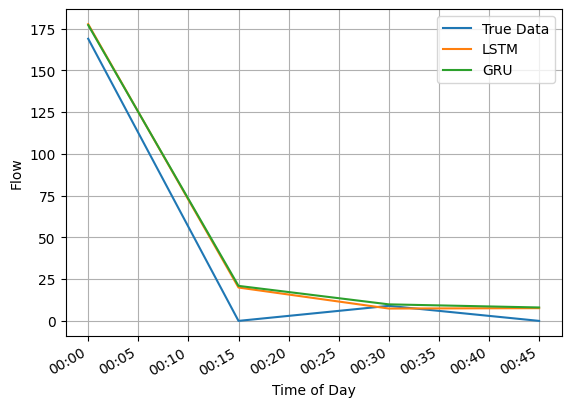

In [33]:
plot_results(y_test, y_preds, names, periods)